# Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import utils
import matplotlib.pyplot as plt
import torch

 # Import the data

In [2]:
df = pd.read_csv(r"D:\CWD\data\Cancer_Prediction.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Clean the data

<Axes: >

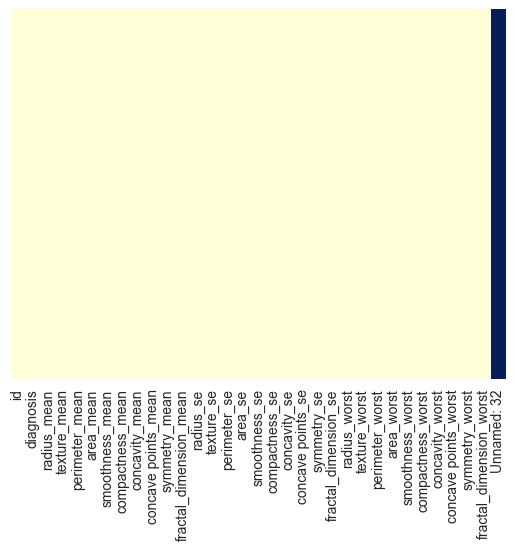

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

In [7]:
# drop id and empty column
df.drop(['Unnamed: 32', "id"], axis=1, inplace=True)
# turn target variable into 1 and 0
df.diagnosis = [1 if value == "M" else 0 for value in df.diagnosis]
# turn the target variable into categorical data
df['diagnosis'] = df['diagnosis'].astype('category', copy=False)

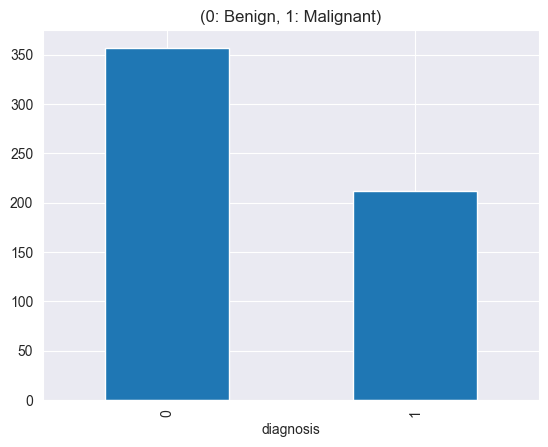

In [8]:
plot = df['diagnosis'].value_counts().plot(kind='bar',title='(0: Benign, 1: Malignant)')
fig = plot.get_figure()

# Logistic Regression

## Preprocessing

In [9]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

## Normalize the data

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
t1 = time.time()

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')

accuracy: 0.9736842105263158


# Compare craig greedy - craig on convex-hull

In [13]:
# Tính gradient từng điểm: gradient_i = (p_i - y_i) * X_i
def compute_individual_gradients(model, X, y):
    p = model.predict_proba(X)[:, 1]
    y_array = y.astype(int).values
    grads = (p - y_array).reshape(-1, 1) * X
    return grads

In [14]:
gradient_points = compute_individual_gradients(lr, X, y)
dimension = len(X[0])
G = np.sum(gradient_points, axis=0)

In [15]:
time_craig = []
time_craig_hull = []
accuracy_craig = []
accuracy_craig_hull = []

## craig greedy

In [16]:
print(f"\n=== Simulation for {dimension}D ===")
print("=== CRAIG gốc ===")

percs = [0.01, 0.013, 0.016, 0.017, 0.018, 0.019, 0.035, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

for perc in percs:
    k = int(perc * len(X))
    print(f"\n=== Thử với k = {k} (~{perc*100:.0f}% dữ liệu) ===")

    t0_craig = time.time()
    S, w, G_approx, R = utils.craig_greedy(gradient_points, G, k)
    t1_craig = time.time()
    time_craig.append(t1_craig - t0_craig)

    relative_error = np.linalg.norm(R) / np.linalg.norm(G)
    print(f"Relative error gradient - CRAIG gốc: {relative_error}")
    print(f"Thời gian CRAIG gốc: {t1_craig - t0_craig:.4f} giây\n")

    coreset_indices = S
    X_coreset = X[coreset_indices]
    y_coreset = y[coreset_indices]

    lr_coreset = LogisticRegression()

    lr_coreset.fit(X_coreset, y_coreset)

    y_pred = lr_coreset.predict(X_test)
    accuracyCraig = accuracy_score(y_test, y_pred)
    accuracy_craig.append(accuracyCraig)
    print(f'Accuracy - craig greedy: {accuracy}')


=== Simulation for 30D ===
=== CRAIG gốc ===

=== Thử với k = 5 (~1% dữ liệu) ===
Relative error gradient - CRAIG gốc: 0.29590488224562594
Thời gian CRAIG gốc: 0.0455 giây

Accuracy - craig greedy: 0.9736842105263158

=== Thử với k = 7 (~1% dữ liệu) ===
Relative error gradient - CRAIG gốc: 0.2556887545752545
Thời gian CRAIG gốc: 0.0542 giây

Accuracy - craig greedy: 0.9736842105263158

=== Thử với k = 9 (~2% dữ liệu) ===
Relative error gradient - CRAIG gốc: 0.2312716712329262
Thời gian CRAIG gốc: 0.0536 giây

Accuracy - craig greedy: 0.9736842105263158

=== Thử với k = 9 (~2% dữ liệu) ===
Relative error gradient - CRAIG gốc: 0.2312716712329262
Thời gian CRAIG gốc: 0.0461 giây

Accuracy - craig greedy: 0.9736842105263158

=== Thử với k = 10 (~2% dữ liệu) ===
Relative error gradient - CRAIG gốc: 0.2243145426299733
Thời gian CRAIG gốc: 0.0696 giây

Accuracy - craig greedy: 0.9736842105263158

=== Thử với k = 10 (~2% dữ liệu) ===
Relative error gradient - CRAIG gốc: 0.2243145426299733
Thờ

## Craig on Convex-Hull (no mean)

In [17]:
print(f"\n=== Simulation for {dimension}D ===")
print("=== CRAIG trên Convex Hull (không có mean) ===")

for perc in percs:
    k = int(perc * len(X))

    print(f"\n=== Thử với k = {k} (~{perc*100:.0f}% dữ liệu) ===")
    # Giảm xuống 10 chiều thay vì 30 chiều
    pca = PCA(n_components=10)
    gradient_points_reduced = pca.fit_transform(gradient_points)

    hull = ConvexHull(gradient_points_reduced)
    hull_indices = list(hull.vertices)

    t0_hull = time.time()
    S_hull, w_hull, G_approx_hull, R_hull = utils.craig_greedy(gradient_points, G, k, indices=hull_indices)
    t1_hull = time.time()
    time_craig_hull.append(t1_hull - t0_hull)

    relative_error_hull = np.linalg.norm(R_hull) / np.linalg.norm(G)
    print(f"Relative error CRAIG Convex Hull: {relative_error_hull:.6f}")
    print(f"Thời gian gradient - CRAIG Convex Hull: {t1_hull - t0_hull:.4f} giây\n")

    coreset_indices_hull = S_hull
    X_coreset_hull = X[coreset_indices_hull]
    y_coreset_hull = y[coreset_indices_hull]

    lr_coreset_hull = LogisticRegression()

    lr_coreset_hull.fit(X_coreset_hull, y_coreset_hull)

    y_pred_hull = lr_coreset_hull.predict(X_test)
    accuracy_hull = accuracy_score(y_test, y_pred_hull)
    accuracy_craig_hull.append(accuracy_hull)
    print(f"Accuracy - craig on Convex Hull: {accuracy_hull}")


=== Simulation for 30D ===
=== CRAIG trên Convex Hull (không có mean) ===

=== Thử với k = 5 (~1% dữ liệu) ===
Relative error CRAIG Convex Hull: 0.621438
Thời gian gradient - CRAIG Convex Hull: 0.0000 giây

Accuracy - craig on Convex Hull: 0.5350877192982456

=== Thử với k = 7 (~1% dữ liệu) ===
Relative error CRAIG Convex Hull: 0.556275
Thời gian gradient - CRAIG Convex Hull: 0.0000 giây

Accuracy - craig on Convex Hull: 0.5614035087719298

=== Thử với k = 9 (~2% dữ liệu) ===
Relative error CRAIG Convex Hull: 0.536757
Thời gian gradient - CRAIG Convex Hull: 0.0000 giây

Accuracy - craig on Convex Hull: 0.5789473684210527

=== Thử với k = 9 (~2% dữ liệu) ===
Relative error CRAIG Convex Hull: 0.536757
Thời gian gradient - CRAIG Convex Hull: 0.0000 giây

Accuracy - craig on Convex Hull: 0.5789473684210527

=== Thử với k = 10 (~2% dữ liệu) ===
Relative error CRAIG Convex Hull: 0.526202
Thời gian gradient - CRAIG Convex Hull: 0.0157 giây

Accuracy - craig on Convex Hull: 0.7017543859649122

# Visualization compare

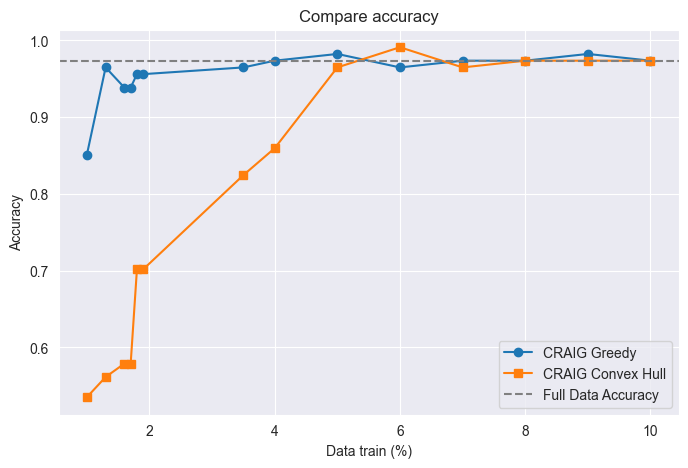

In [18]:
plt.figure(figsize=(8,5))
plt.plot([p*100 for p in percs], accuracy_craig, marker='o', label="CRAIG Greedy")
plt.plot([p*100 for p in percs], accuracy_craig_hull, marker='s', label="CRAIG Convex Hull")
plt.axhline(y=accuracy, color='gray', linestyle='--', label="Full Data Accuracy")
plt.xlabel("Data train (%)")
plt.ylabel("Accuracy")
plt.title("Compare accuracy")
plt.legend()
plt.grid(True)
plt.show()

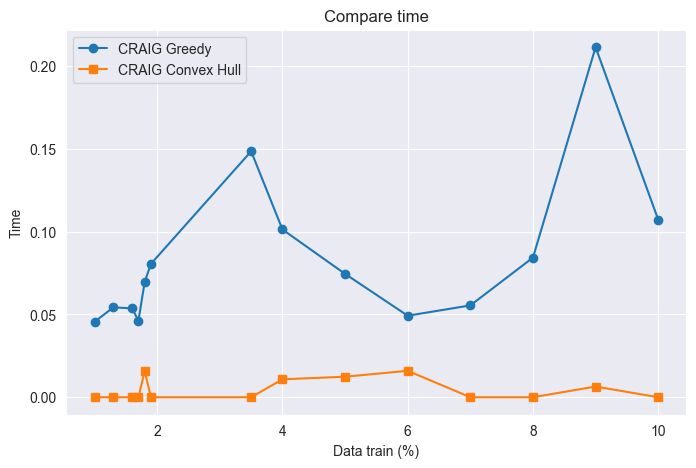

In [19]:
plt.figure(figsize=(8,5))
plt.plot([p*100 for p in percs], time_craig, marker='o', label="CRAIG Greedy")
plt.plot([p*100 for p in percs], time_craig_hull, marker='s', label="CRAIG Convex Hull")
plt.xlabel("Data train (%)")
plt.ylabel("Time")
plt.title("Compare time")
plt.legend()
plt.grid(True)
plt.show()